In [1]:
%matplotlib inline
import milsed
import json
import pickle
import os

Using TensorFlow backend.


In [2]:
OUTPUT_PATH = '/home/js7561/dev/milsed/models/resources/'

# First batch of models:

190cd92.0 (pid 1574782): 27 hours: crnn1d_smp, default params, no augmentation

190cd92.1 (pid 1574783): 7 hours: crnn1d_max, default params, no augmentation

190cd92.2 (pid 1574944): 27 hours: crnn1d_avg, default params, no augmentation

190cd92.3 (pid 1574945): 1 hours: cnn1d_smp, default params, no augmentation

190cd92.4 (pid 1574946): cnn1d_max, default params, no augmentation

190cd92.5 (pid 1574948): cnn1d_avg, default params, no augmentation

In [3]:
models = ['190cd92.0', '190cd92.1', '190cd92.2', '190cd92.3', '190cd92.4', '190cd92.5']

In [4]:
milsed.eval.compare_results(OUTPUT_PATH, models)

,version,model,n_weights,w_f1,w_p,w_r,s_f1,s_p,s_r,s_e
4,190cd92.0,crnn1d_smp,177237,0.232506,0.367857,0.169967,0.247321,0.208288,0.304358,1.34794
3,190cd92.1,crnn1d_max,177237,0.163265,0.26087,0.118812,0.071561,0.186654,0.0442661,1.00275
2,190cd92.2,crnn1d_avg,177237,0.21764,0.355805,0.156766,0.219263,0.172691,0.300229,1.58303
1,190cd92.3,cnn1d_smp,25749,0.147685,0.305699,0.0973597,0.186294,0.136485,0.293349,1.98647
0,190cd92.4,cnn1d_max,25749,0.158343,0.302326,0.107261,0.0716846,0.271903,0.0412844,0.984862
5,190cd92.5,cnn1d_avg,25749,0.153459,0.322751,0.10066,0.186791,0.119865,0.422936,3.15298


We see that model **190cd92.0** (CRNN + SMP) performs best. Digging into this model:

Model     190cd92.0

Weak:
recall    0.170
precision 0.368
f1        0.233

Strong:
precision 0.208
recall    0.304
f1        0.247
e_rate    1.348

Strong per-class:                       P	R	F	E
Car alarm                               0.485	0.098	0.162	1.006
Fire engine, fire truck (siren)         0.294	0.498	0.370	1.698
Train                                   0.272	0.155	0.198	1.260
Car                                     0.107	0.728	0.187	6.344
Police car (siren)                      0.226	0.469	0.305	2.137
Train horn                              0.460	0.187	0.266	1.032
Bicycle                                 0.079	0.112	0.092	2.199
Air horn, truck horn                    0.434	0.120	0.188	1.036
Civil defense siren                     0.618	0.679	0.647	0.741
Car passing by                          0.183	0.044	0.071	1.151
Screaming                               0.346	0.269	0.303	1.239
Truck                                   0.198	0.245	0.219	1.751
Ambulance (siren)                  

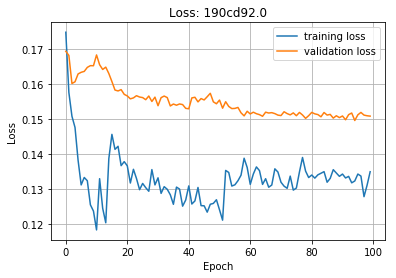

In [4]:
milsed.eval.report_results(OUTPUT_PATH, '190cd92.0')

Compare with 190cd92.3: the equivalent CNN model (but note capacity is much smaller, 25k vs 177k)

Model     190cd92.3

Weak:
recall    0.097
precision 0.306
f1        0.148

Strong:
precision 0.136
recall    0.293
f1        0.186
e_rate    1.986

Strong per-class:                       P	R	F	E
Car alarm                               0.333	0.146	0.203	1.146
Fire engine, fire truck (siren)         0.218	0.461	0.296	2.196
Train                                   0.322	0.075	0.122	1.083
Car                                     0.093	0.884	0.168	8.739
Police car (siren)                      0.197	0.528	0.287	2.624
Train horn                              0.360	0.265	0.305	1.206
Bicycle                                 0.058	0.429	0.102	7.565
Air horn, truck horn                    0.368	0.182	0.244	1.130
Civil defense siren                     0.295	0.641	0.404	1.893
Car passing by                          nan	0.000	nan	1.000
Screaming                               0.120	0.249	0.162	2.582
Truck                                   0.179	0.078	0.109	1.281
Ambulance (siren)                      

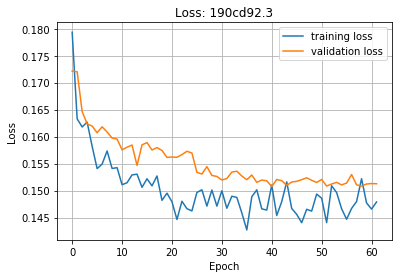

In [5]:
milsed.eval.report_results(OUTPUT_PATH, '190cd92.3')

## Second batch of models (all using SMP)

bf9940f.1 (pid 1596156): 1:40hr: cnn1d2_smp, new default params (2048 streams, decay rate of 4), no aug

bf9940f.7 (pid 1600614): crnn2d_smp, new defaults, no aug

bf9940f.3 (pid 1596177): cnn1d2_smp, new defaults, AUGMENT

bf9940f.4 (pid 1596208): crnn2d_smp, new defaults, AUGMENT

bf9940f.5 (pid 1596209): crnn1d_smp, new defaults, AUGMENT

bf9940f.6 (pid 1596210): cnn1d_smp, new defaults, AUGMENT

In [5]:
# ALL WITH SMP
# Compare small CNN1D (25k) with CNN1D that has same capacity as crnn (177k) with CRNN1D (177k)
models2 = ['190cd92.3', 'bf9940f.1', '190cd92.0']

In [6]:
milsed.eval.compare_results(OUTPUT_PATH, models2)

,version,model,n_weights,w_f1,w_p,w_r,s_f1,s_p,s_r,s_e
0,190cd92.0,crnn1d_smp,177237,0.232506,0.367857,0.169967,0.247321,0.208288,0.304358,1.34794
1,190cd92.3,cnn1d_smp,25749,0.147685,0.305699,0.0973597,0.186294,0.136485,0.293349,1.98647
2,bf9940f.1,cnn1d2_smp,176981,0.1868,0.380711,0.123762,0.22435,0.14679,0.475688,2.81101


In [14]:
params = json.load(open(os.path.join(OUTPUT_PATH, '190cd92.3', 'params.json'), 'r'))

In [15]:
params

{'alpha': 1.0,
 'augment': False,
 'batch_size': 32,
 'duration': 10.0,
 'early_stopping': 20,
 'epoch_size': 512,
 'epochs': 100,
 'max_samples': 128,
 'modelname': 'cnn1d_smp',
 'rate': 8,
 'reduce_lr': 10,
 'seed': 20170612,
 'strong_labels_file': '/beegfs/js7561/datasets/dcase2017/task4_official/combined/metadata/labels/groundtruth_strong_label_testing_set.csv',
 'train_streamers': 1024,
 'validation_size': 1024,
 'verbose': False,
 'working': '/beegfs/js7561/datasets/dcase2017/task4_official/combined/features_silence/'}

## All models that have managed to train so far (some still running)

* crnn1d_smp: 190cd92.0 (pid 1574782): 27 hours
* crnn1d_max: 190cd92.1 (pid 1574783): 7 hours
* crnn1d_avg: 190cd92.2 (pid 1574944): 27 hours
* cnn1d_smp: 190cd92.3 (pid 1574945): completed.
* cnn1d_max: 190cd92.4 (pid 1574946): completed.
* cnn1d_avg: 190cd92.5 (pid 1574948): completed.
* crnn2d_smp: bb949b2.4 (pid 1641166): running...
* cnn1d2_smp: bf9940f.1 (pid 1596156): 1:40hr
* cbhg_smp: 32e1f20.0 (pid 1627628): running...
* crnn2d2_smp: bb949b2.1 (pid 1641147): 4:22

In [ ]:

milsed.eval.score_model()

In [6]:
models3 = (['190cd92.0', '190cd92.1', '190cd92.2', '190cd92.3', '190cd92.4', '190cd92.5', 
            'bb949b2.4', 'bf9940f.1', '32e1f20.0', 'bb949b2.1']) 
milsed.eval.compare_results(OUTPUT_PATH, models3)

,version,model,n_weights,w_f1,w_p,w_r,s_f1,s_p,s_r,s_e
5,190cd92.0,crnn1d_smp,177237,0.232506,0.367857,0.169967,0.247321,0.208288,0.304358,1.34794
8,190cd92.1,crnn1d_max,177237,0.163265,0.26087,0.118812,0.071561,0.186654,0.0442661,1.00275
6,190cd92.2,crnn1d_avg,177237,0.21764,0.355805,0.156766,0.219263,0.172691,0.300229,1.58303
0,190cd92.3,cnn1d_smp,25749,0.147685,0.305699,0.0973597,0.186294,0.136485,0.293349,1.98647
1,190cd92.4,cnn1d_max,25749,0.158343,0.302326,0.107261,0.0716846,0.271903,0.0412844,0.984862
3,190cd92.5,cnn1d_avg,25749,0.153459,0.322751,0.10066,0.186791,0.119865,0.422936,3.15298
2,32e1f20.0,cbhg_smp,3408657,0.166871,0.325359,0.112211,0.229461,0.175995,0.329587,1.61881
9,bb949b2.1,crnn2d2_smp,1424149,0.207065,0.395349,0.140264,0.262791,0.246827,0.280963,1.13876
4,bb949b2.4,crnn2d_smp,4569877,0.250292,0.429719,0.176568,0.25421,0.167406,0.527982,2.65161
7,bf9940f.1,cnn1d2_smp,176981,0.1868,0.380711,0.123762,0.22435,0.14679,0.475688,2.81101


In [8]:
models4 = (['190cd92.0', 'bb949b2.4', '32e1f20.0', 'bb949b2.1']) 
milsed.eval.compare_results(OUTPUT_PATH, models4)

,version,model,n_weights,w_f1,w_p,w_r,s_f1,s_p,s_r,s_e
0,190cd92.0,crnn1d_smp,177237,0.232506,0.367857,0.169967,0.247321,0.208288,0.304358,1.34794
2,32e1f20.0,cbhg_smp,3408657,0.166871,0.325359,0.112211,0.229461,0.175995,0.329587,1.61881
1,bb949b2.1,crnn2d2_smp,1424149,0.207065,0.395349,0.140264,0.262791,0.246827,0.280963,1.13876
3,bb949b2.4,crnn2d_smp,4569877,0.250292,0.429719,0.176568,0.25421,0.167406,0.527982,2.65161
